<a id='home'></a>
<img src="../img/BCTheme.png"><br>
<div style="text-align: right">
    <p style="text-align: right; font-size:16px; font-style: italic">Filipi Rigui</p>
    <a href="https://www.linkedin.com/in/filipirigui/"><img border="0" alt="LinkedIn" src="../img/in.png" width="32" height="32"></a>   
    <a href="https://github.com/fdrigui"><img border="0" alt="LinkedIn" src="../img/gh.png" width="32" height="32"></a>
</div><br>
<p><i>Para uma melhor imersão visual, abrir projeto no <b>Jupyter ou Google Colab</b></i></p>

  [ **Readme Módulo 02**](readme.md)<br>

| [Aula 01](Aula_01.ipynb) | [Aula 3](Aula_03.ipynb) |

<h1><b><span style="color:#5C0040">Aula 02:</span></b> Taxa de crescimento e média móvel</h1>

<a id='nota'></a>
______________________________________
<h2><b><span style="color:#5C0040">Anotações:</span></b></h2>

<a id='aula'></a>
________________________________
<h2><b><span style="color:#5C0040">Aula:</span></b></h2>

In [1]:
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import numpy as np
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot as plt

In [2]:
mpl.rcParams['font.size'] = 18
mpl.rcParams['figure.figsize'] = (15,8)

<h3><b><span style="color:#5C0040">Referência de módulos anteriores</span></b></h3>

In [3]:
url = 'https://github.com/allanspadini/Prophet_covid/raw/main/dados_covid_sp.zip'

dados = pd.read_csv(url, sep=';')
dados['datahora'] = pd.to_datetime(dados['datahora'], format='%Y-%m-%d')
dados_sp = dados.query('nome_munic == "São Paulo"').copy()

<h3><b><span style="color:#5C0040">Taxa de crescimento e média móvel</span></b></h3>

<AxesSubplot:xlabel='datahora', ylabel='casos_novos'>

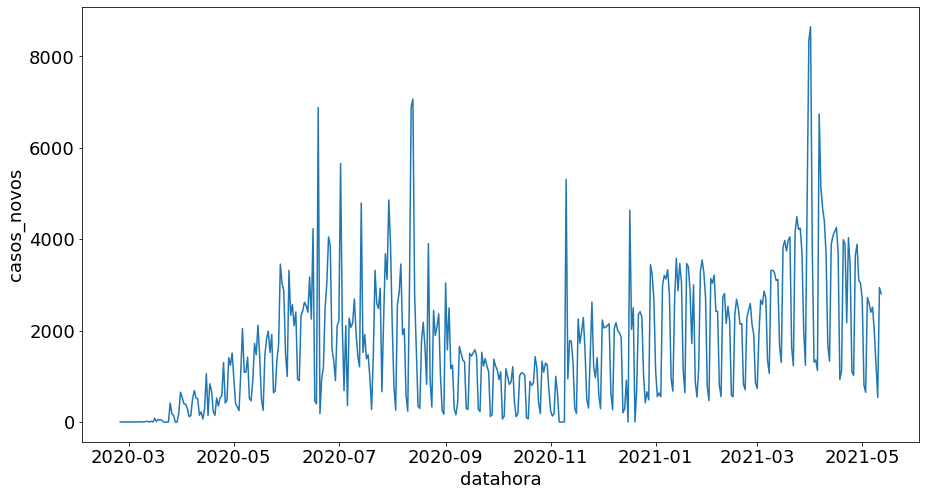

In [4]:
sns.lineplot(x='datahora', y='casos_novos', data=dados_sp)

In [5]:
dados_exemplo = pd.DataFrame(data=np.linspace(1,10))

<AxesSubplot:>

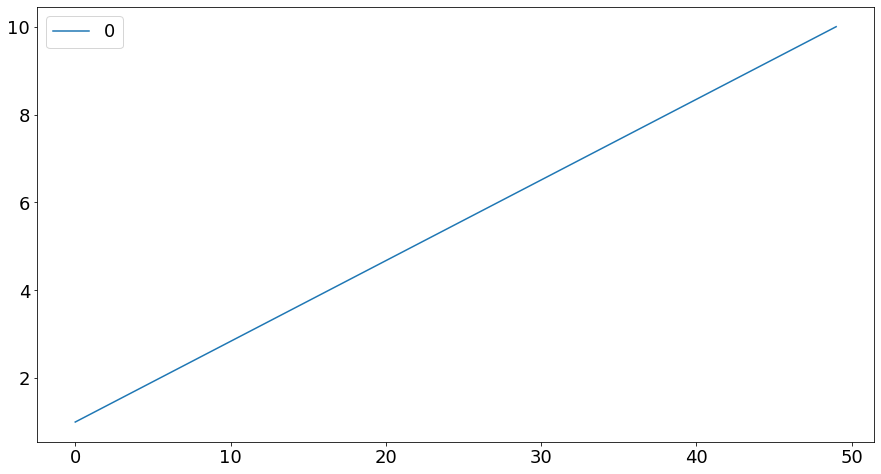

In [6]:
sns.lineplot(data=dados_exemplo)

In [7]:
dados_exemplo['diferenciado'] = dados_exemplo.diff()

<AxesSubplot:xlabel='0', ylabel='0'>

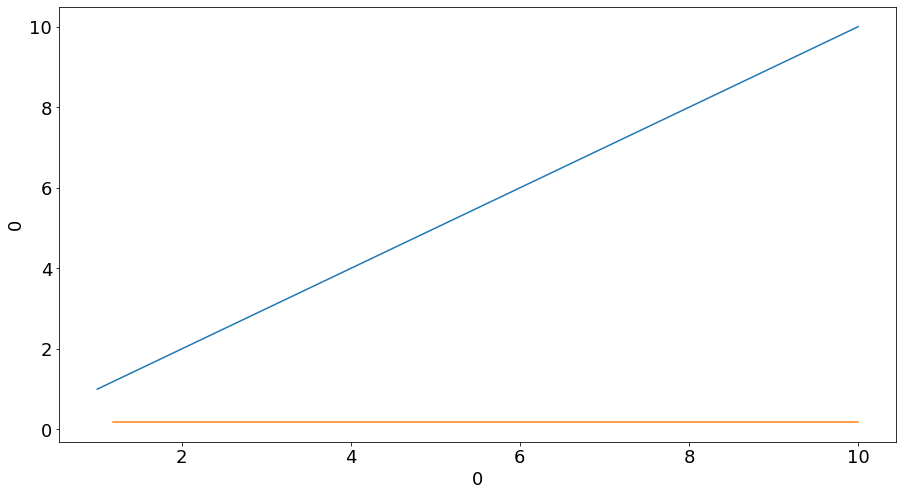

In [8]:
sns.lineplot(x=0, y=0, data=dados_exemplo)
sns.lineplot(x=0, y='diferenciado', data=dados_exemplo)

In [9]:
dados_sp['taxa_de_crescimento_casos'] = dados_sp['casos_novos'].diff()
dados_sp['taxa_de_crescimento_obitos'] = dados_sp['obitos_novos'].diff()

<AxesSubplot:xlabel='datahora', ylabel='taxa_de_crescimento_casos'>

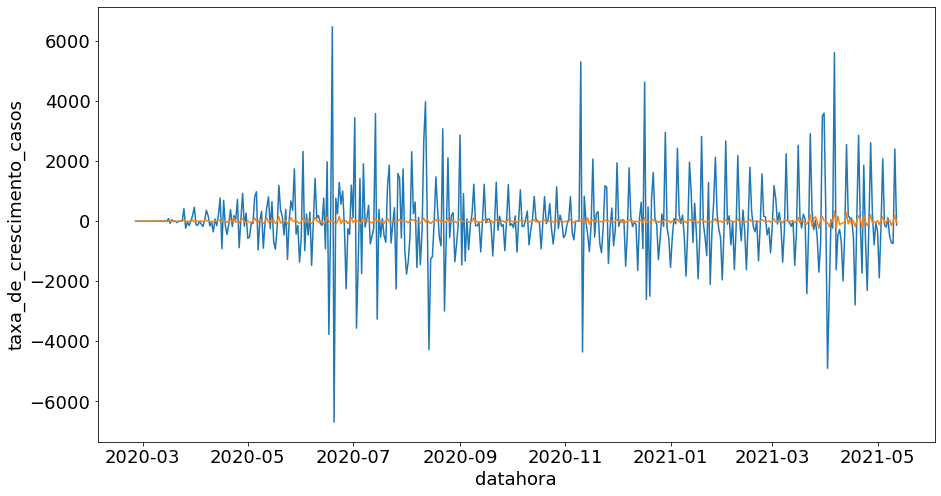

In [10]:
sns.lineplot(x='datahora', y='taxa_de_crescimento_casos', data=dados_sp)
sns.lineplot(x='datahora', y='taxa_de_crescimento_obitos', data=dados_sp)

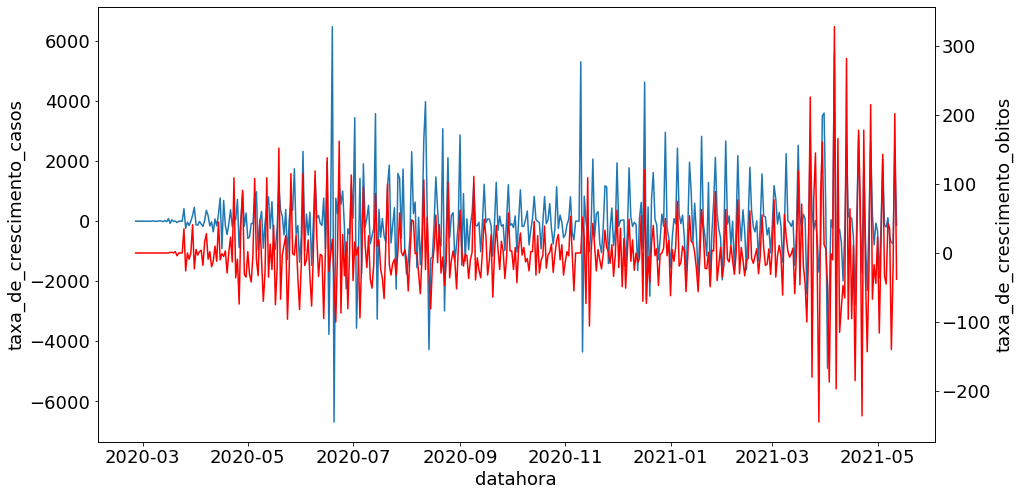

In [11]:
ax1 = sns.lineplot(x='datahora', y='taxa_de_crescimento_casos', data=dados_sp)
ax2 = ax1.twinx()
ax2 = sns.lineplot(x='datahora', y='taxa_de_crescimento_obitos', data=dados_sp, color='red')

<AxesSubplot:xlabel='datahora', ylabel='taxa_de_crescimento_obitos'>

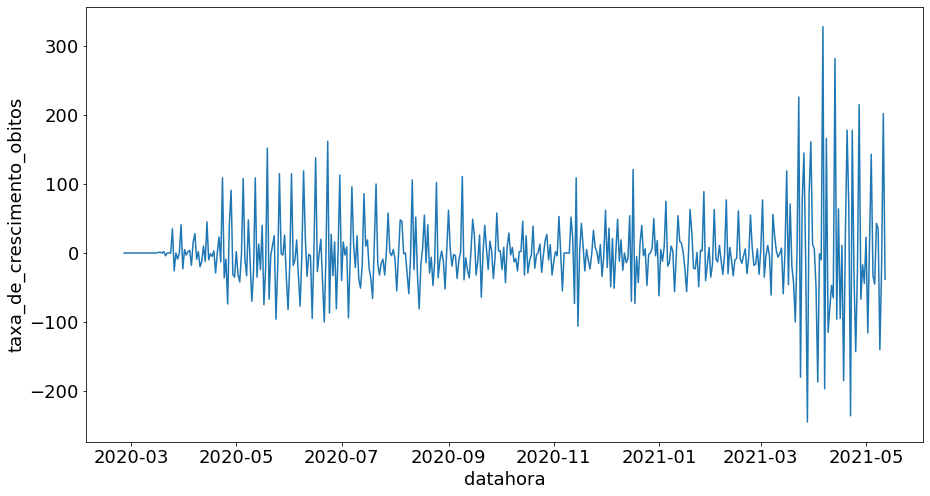

In [12]:
sns.lineplot(x='datahora', y='taxa_de_crescimento_obitos', data=dados_sp)

In [13]:
dados_sp['ano'] = pd.DatetimeIndex(dados_sp['datahora']).year

In [14]:
dados_2021 = dados_sp.query('ano==2021')

<BarContainer object of 132 artists>

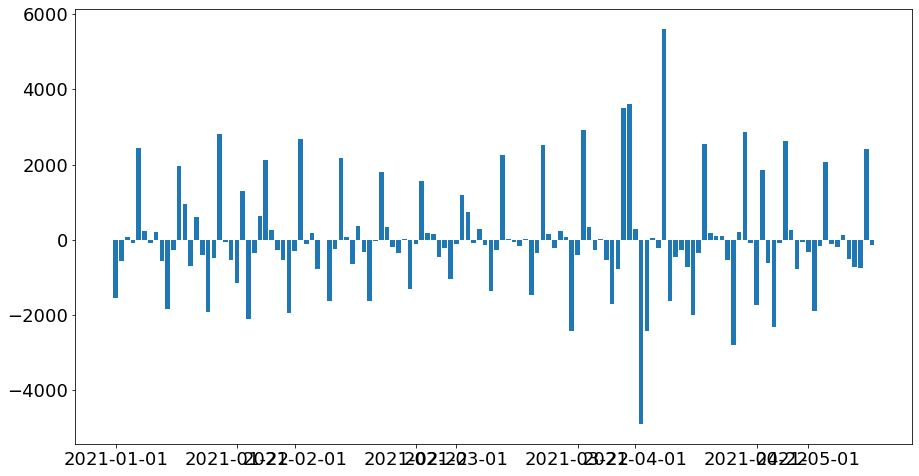

In [15]:
mpl.pyplot.bar(dados_2021['datahora'], dados_2021['taxa_de_crescimento_casos'])

In [16]:
dados_sp['media_movel_casos'] = dados_sp['casos_novos'].rolling(window=7, center=False).mean()
dados_sp['media_movel_obitos'] = dados_sp['obitos_novos'].rolling(window=7, center=False).mean()

<AxesSubplot:xlabel='datahora', ylabel='casos_novos'>

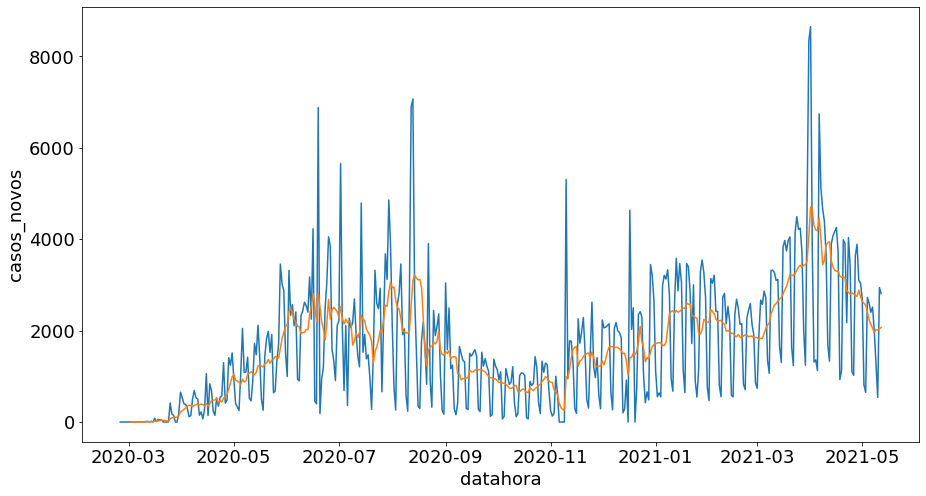

In [17]:
sns.lineplot(x='datahora', y='casos_novos', data=dados_sp)
sns.lineplot(x='datahora', y='media_movel_casos', data=dados_sp)

<AxesSubplot:xlabel='datahora', ylabel='obitos_novos'>

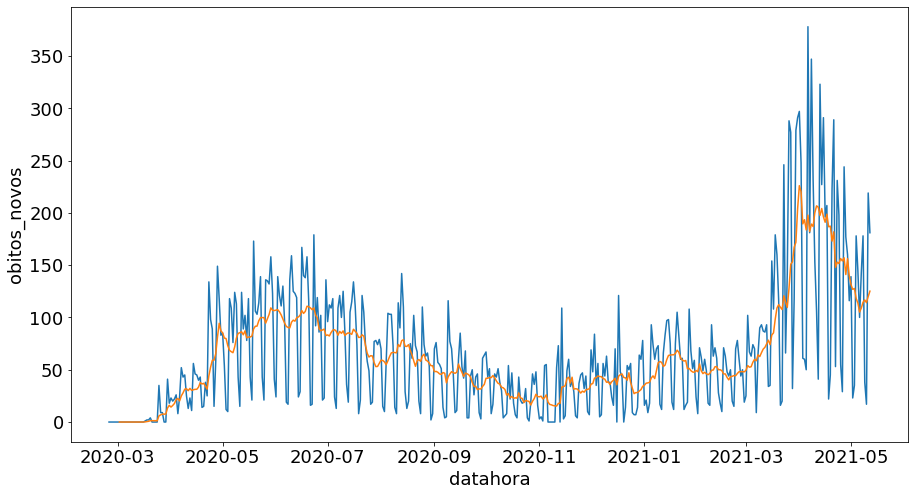

In [18]:
sns.lineplot(x='datahora', y='obitos_novos', data=dados_sp)
sns.lineplot(x='datahora', y='media_movel_obitos', data=dados_sp)

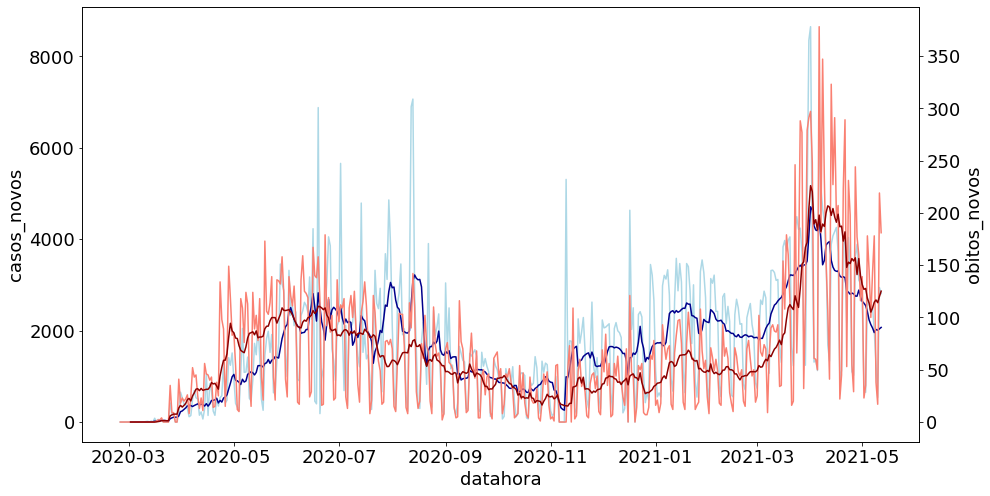

In [19]:
ax1 = sns.lineplot(x='datahora', y='casos_novos',color = 'lightblue', data=dados_sp)
ax1 = sns.lineplot(x='datahora', y='media_movel_casos',color = 'darkblue', data=dados_sp)
ax2 = ax1.twinx()
ax2 = sns.lineplot(x='datahora', y='obitos_novos', color = 'salmon', data=dados_sp)
ax2 = sns.lineplot(x='datahora', y='media_movel_obitos', color = 'darkred', data=dados_sp)

<AxesSubplot:xlabel='casos', ylabel='casos'>

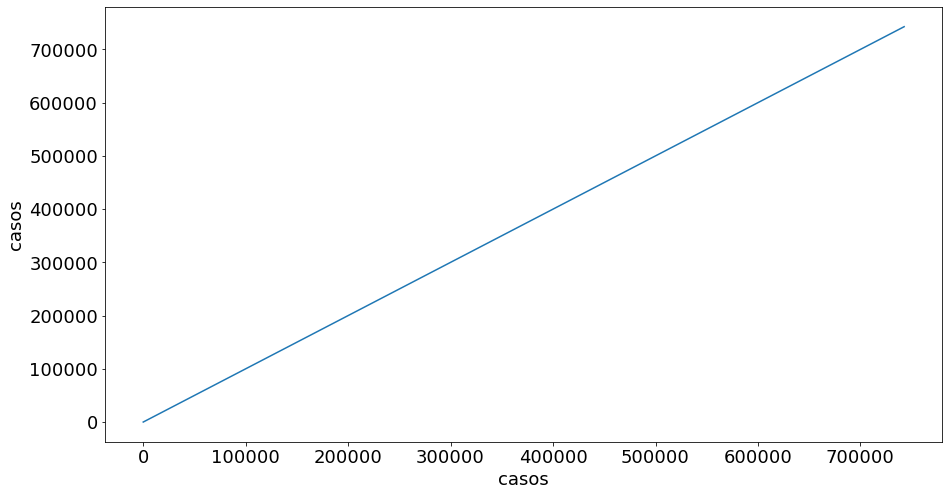

In [20]:
sns.lineplot(x='casos', y='casos', data=dados_sp)

<AxesSubplot:xlabel='casos_novos', ylabel='obitos_novos'>

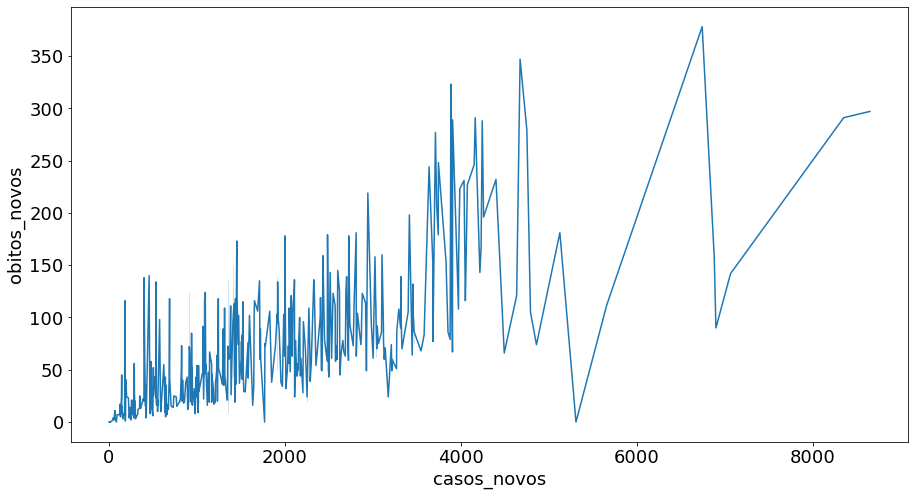

In [21]:
sns.lineplot(x='casos_novos', y='obitos_novos', data=dados_sp)

<AxesSubplot:xlabel='media_movel_casos', ylabel='media_movel_obitos'>

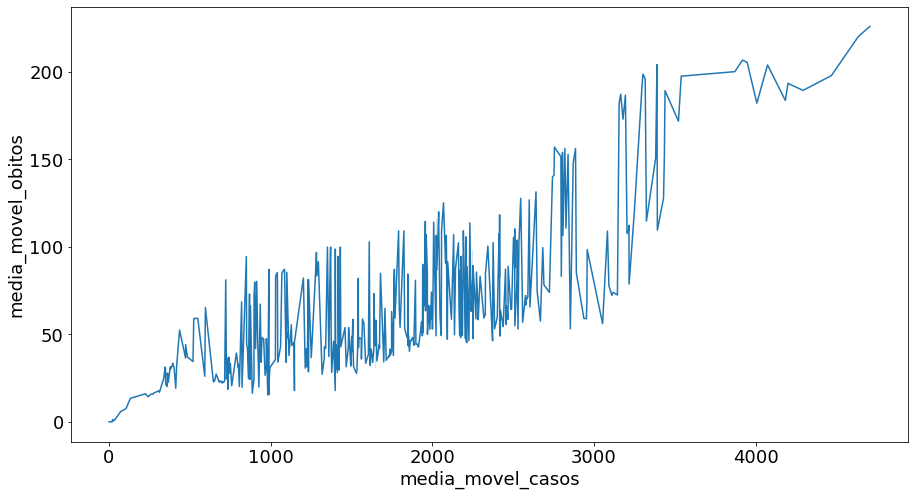

In [22]:
sns.lineplot(x='media_movel_casos', y='media_movel_obitos', data=dados_sp)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

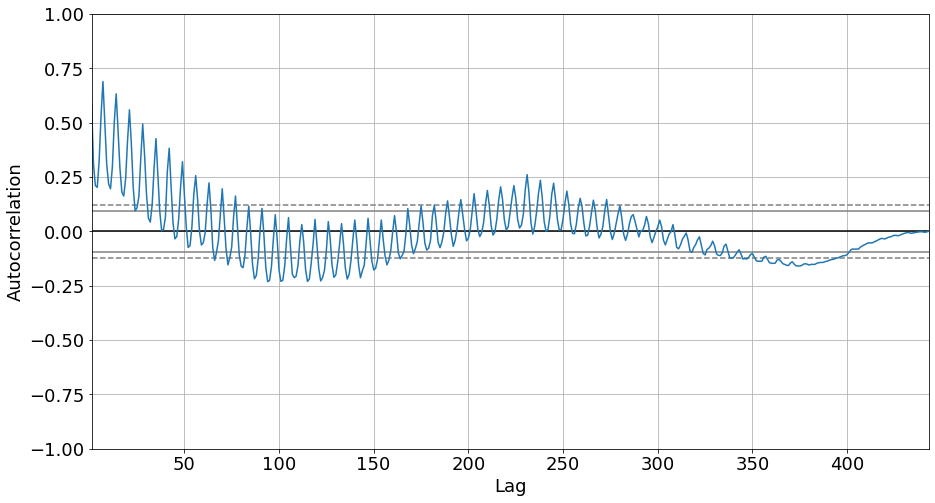

In [23]:
autocorrelation_plot(dados_sp['casos_novos'])

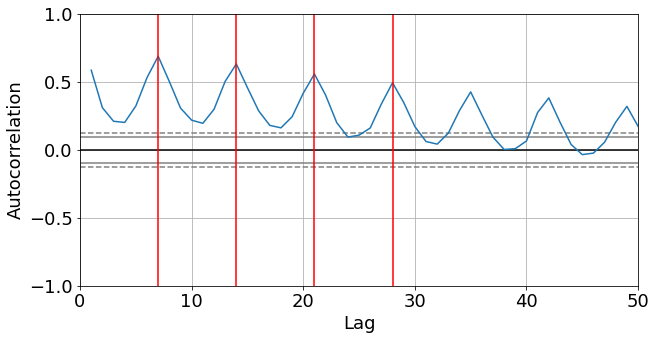

In [24]:
plt.figure(figsize=(10,5))
autocorrelation_plot(dados_sp['casos_novos'])
plt.axvline(x = 7, color = 'r', linestyle = '-')
plt.axvline(x = 14, color = 'r', linestyle = '-')
plt.axvline(x = 21, color = 'r', linestyle = '-')
plt.axvline(x = 28, color = 'r', linestyle = '-')
plt.xlim(0,50)
plt.show()

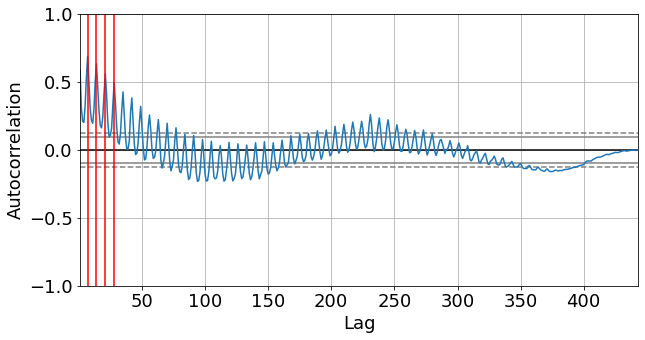

In [25]:
plt.figure(figsize=(10,5))
autocorrelation_plot(dados_sp['casos_novos'])
plt.axvline(x = 7, color = 'r', linestyle = '-')
plt.axvline(x = 14, color = 'r', linestyle = '-')
plt.axvline(x = 21, color = 'r', linestyle = '-')
plt.axvline(x = 28, color = 'r', linestyle = '-')
plt.show()

<AxesSubplot:>

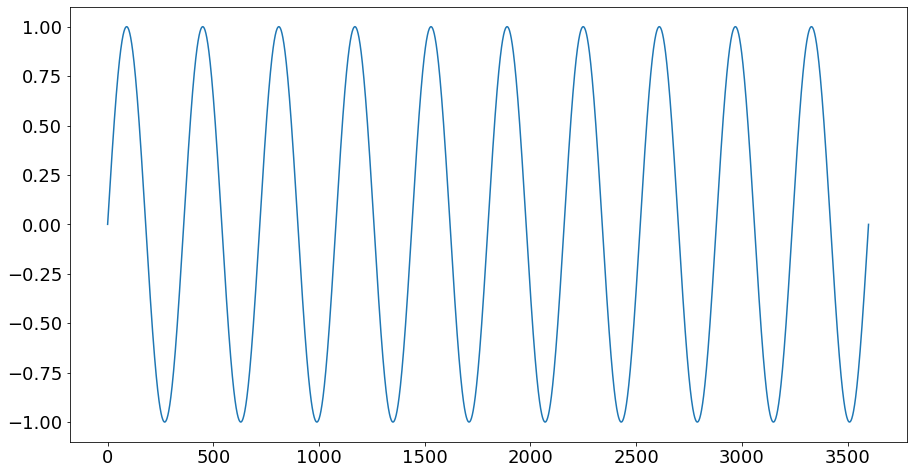

In [26]:
dados_exemplo_1 = pd.DataFrame(data=np.linspace(0,3600, 3600), columns=['ref'])
dados_exemplo_1['sen'] = np.sin(dados_exemplo_1['ref'] * np.pi / 180)
dados_exemplo_1['sen'].plot()

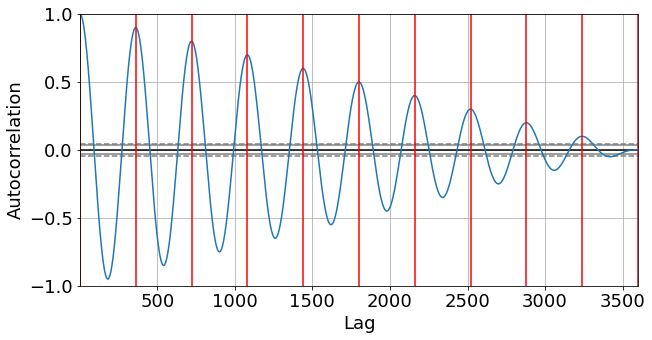

In [27]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,5))
autocorrelation_plot(dados_exemplo_1['sen'])

for line in np.linspace(0,3600, 11):
    plt.axvline(x = line, color = 'r', linestyle = '-')

In [28]:
dados_sp['casos_novos'].size

443

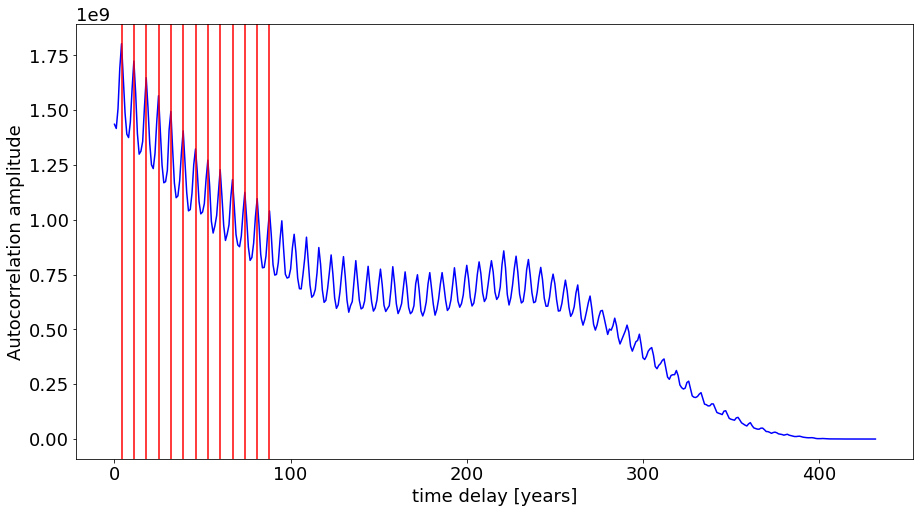

In [29]:
N = dados_sp['casos_novos'].size
T = 1 / 365
t_n = N * T
f_s = 365

autocorr  = np.correlate(dados_sp['casos_novos'], dados_sp['casos_novos'], mode='full')
autocorr = autocorr[len(autocorr)//2:]
x_autocorr = np.array([T * jj for jj in range(0, N)])

x_autocorr = x_autocorr[10:]
autocorr = autocorr[10:]

x=4
#plt.plot(x_autocorr[10:], autocorr[10:], linestyle='-', color='blue')
plt.plot(autocorr, linestyle='-', color='blue')
plt.axvline(x = x, color = 'r', linestyle = '-')
x = x + 7
plt.axvline(x = x, color = 'r', linestyle = '-')
x = x + 7
plt.axvline(x = x, color = 'r', linestyle = '-')
x = x + 7
plt.axvline(x = x, color = 'r', linestyle = '-')
x = x + 7
plt.axvline(x = x, color = 'r', linestyle = '-')
x = x + 7
plt.axvline(x = x, color = 'r', linestyle = '-')
x = x + 7
plt.axvline(x = x, color = 'r', linestyle = '-')
x = x + 7
plt.axvline(x = x, color = 'r', linestyle = '-')
x = x + 7
plt.axvline(x = x, color = 'r', linestyle = '-')
x = x + 7
plt.axvline(x = x, color = 'r', linestyle = '-')
x = x + 7
plt.axvline(x = x, color = 'r', linestyle = '-')
x = x + 7
plt.axvline(x = x, color = 'r', linestyle = '-')
x = x + 7
plt.axvline(x = x, color = 'r', linestyle = '-')

plt.xlabel('time delay [years]')
plt.ylabel('Autocorrelation amplitude')
plt.show()

In [30]:
365*3

1095

65
[ 1 18 37 55]
[0.0078125 0.140625  0.2890625 0.4296875]
[ 787.13847243 1071.31399906   37.39390674    4.30145407]


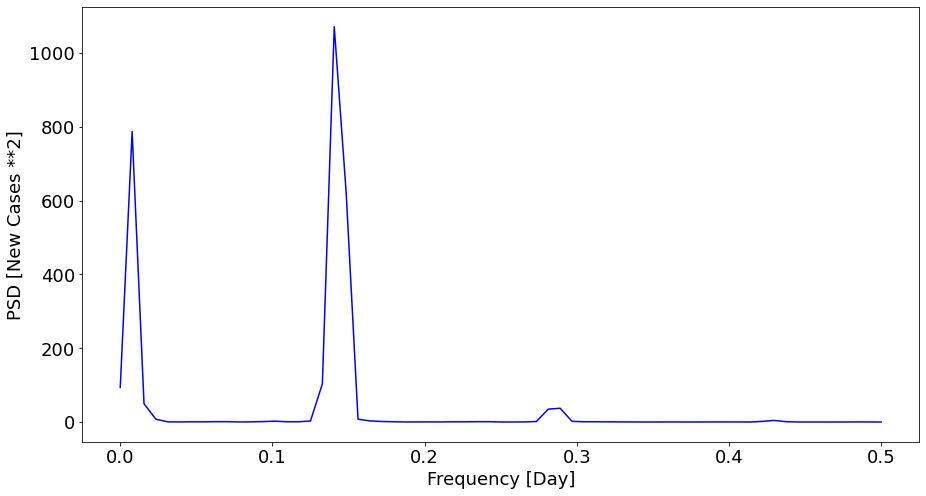

In [37]:
from scipy.fftpack import fft
from scipy.signal import welch
from detecta import detect_peaks

f_val, psd_val = welch(autocorr, fs=1, window='hann', nperseg=128, scaling = 'spectrum', noverlap=64)
print(f_val.size)
peaks = detect_peaks(psd_val, edge='rising', valley=False, mpd=10, show=False)

##peaks, _ = find_peaks(psd_val, threshold=0.1)
print(peaks)
print(f_val[peaks])
print(psd_val[peaks])

plt.plot(f_val, psd_val, linestyle='-', color='blue')
#plt.plot(f_val[peaks], psd_val[peaks], "x")
#plt.axvline(x = 3, color = 'r', linestyle = '-')
plt.xlabel('Frequency [Day]')
plt.ylabel('PSD [New Cases **2]')
plt.show()

N: 443, t_n: 1.2136986301369863, T: 0.0027397260273972603, f_s: 365


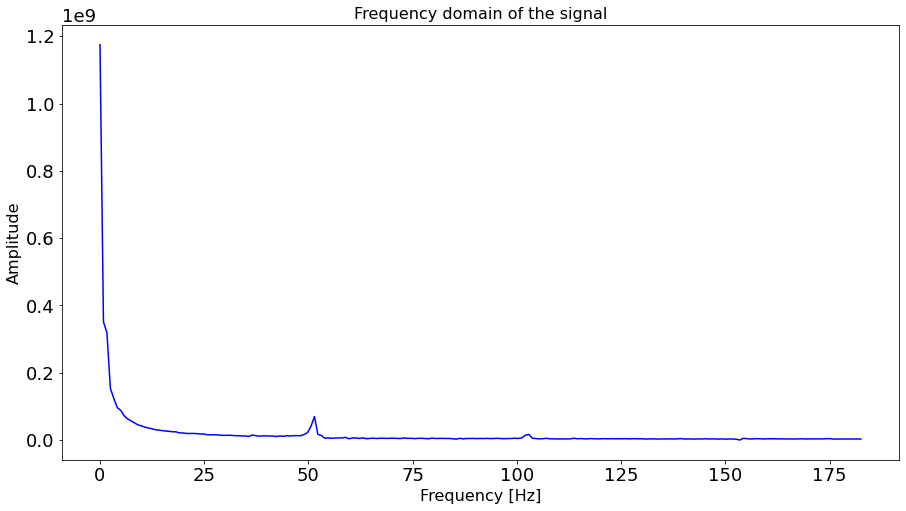

In [32]:
from scipy.signal import find_peaks

print(f'N: {N}, t_n: {t_n}, T: {T}, f_s: {f_s}')

f_values = np.linspace(0.0, 1.0/(2.0*T), N//2)
fft_values_ = fft(autocorr)
fft_values = 2.0/N * np.abs(fft_values_[0:N//2])

#peaks, _ = find_peaks(fft_values, height=0.2)
#print(f_values[peaks])

plt.plot(f_values, fft_values, linestyle='-', color='blue')
#plt.plot(f_values[peaks], fft_values[peaks], "x")

plt.xlabel('Frequency [Hz]', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
plt.title("Frequency domain of the signal", fontsize=16)
plt.show()

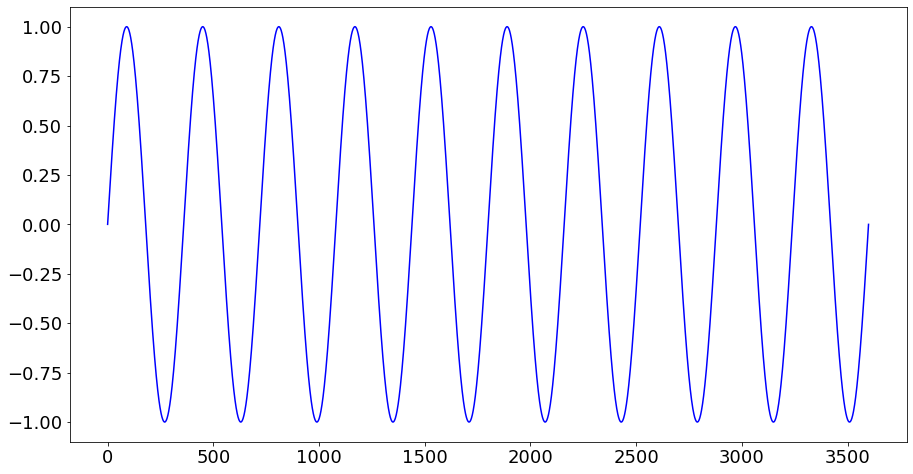

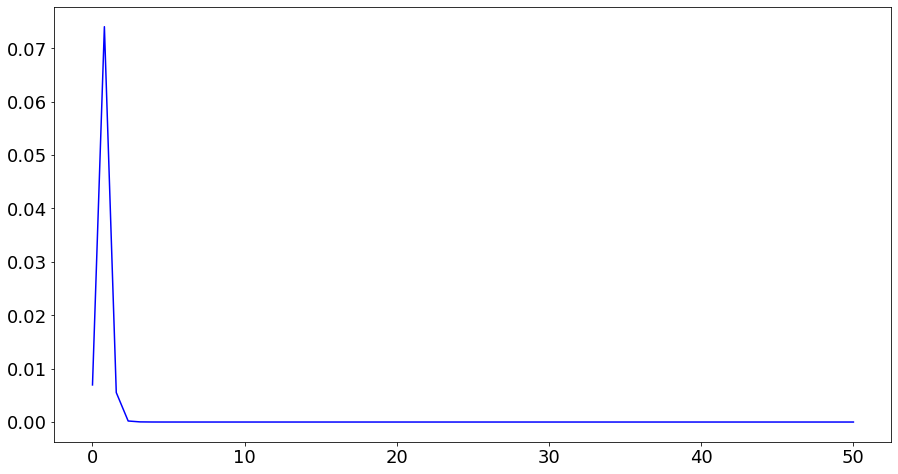

In [33]:
plt.plot(dados_exemplo_1['sen'], linestyle='-', color='blue')
plt.show()
f_val, psd_val = welch(dados_exemplo_1['sen'], fs=100, window='hann', nperseg=128, scaling = 'spectrum', noverlap=64)
plt.plot(f_val, psd_val, linestyle='-', color='blue')
plt.show()

<AxesSubplot:>

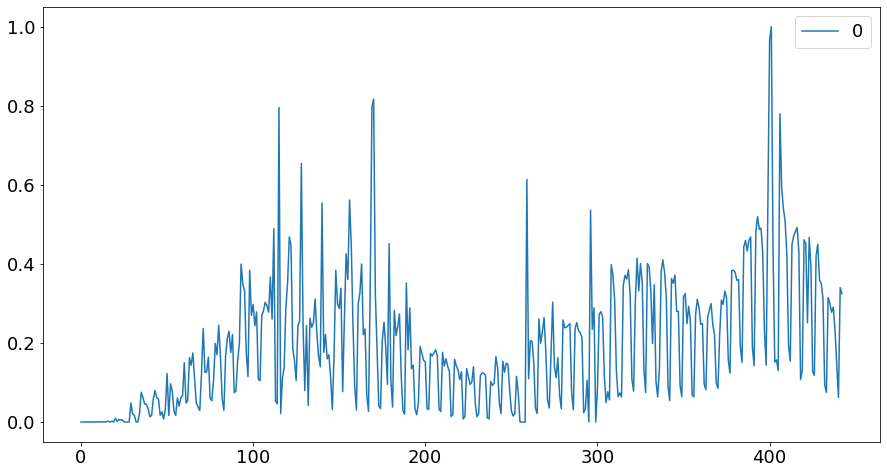

In [34]:

import pandas as pd
from sklearn import preprocessing

x = pd.DataFrame(dados_sp['casos_novos']) #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df.plot()

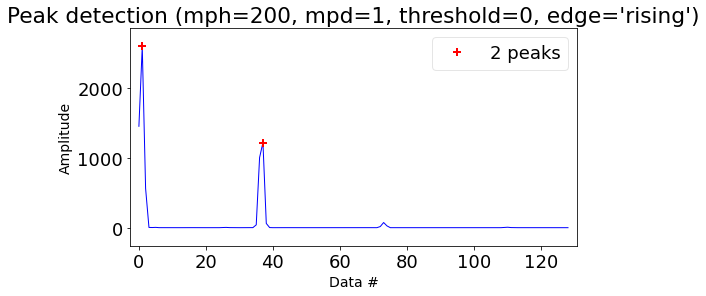

[ 1.42578125 52.75390625]


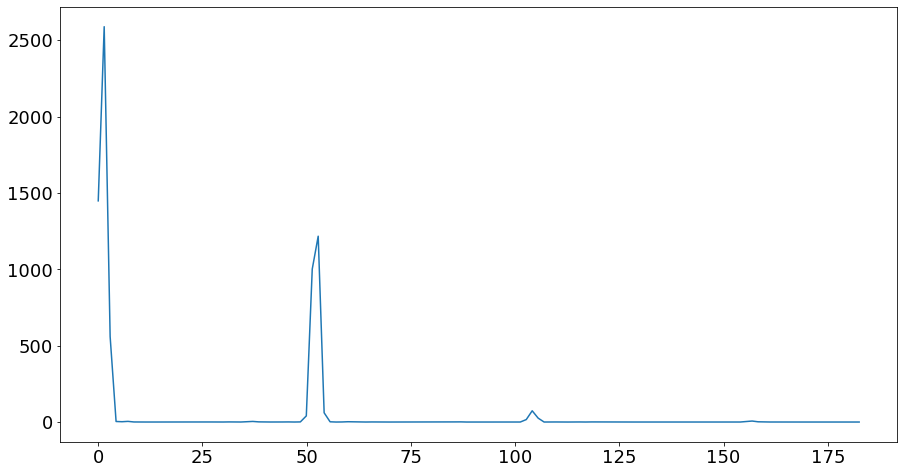

In [35]:
normalized_df=((dados_sp['casos_novos']-dados_sp['casos_novos'].mean())/dados_sp['casos_novos'].std()).reset_index().drop('index', axis=1)
normalized_df

autocorr  = np.correlate(normalized_df['casos_novos'], normalized_df['casos_novos'], mode='full')
autocorr = autocorr[len(autocorr)//2:]
autocorr = autocorr[1:]
x_autocorr = np.array([T * jj for jj in range(0, N)])
x_autocorr = x_autocorr[1:]

f_val, psd_val = welch(autocorr, fs=365, window='hann', nperseg=256, scaling = 'spectrum', noverlap=64)

peaks = detect_peaks(psd_val, edge='rising', valley=False, mph=200, show=True)
print(f_val[peaks])

plt.plot(f_val, psd_val)

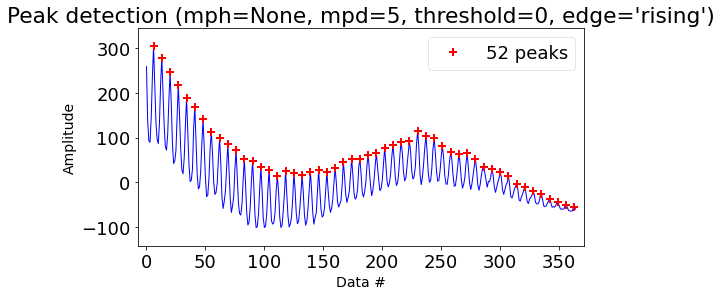

7.0    41
7.0     3
7.0     3
7.0     1
7.0     1
7.0     1
7.0     1
dtype: int64

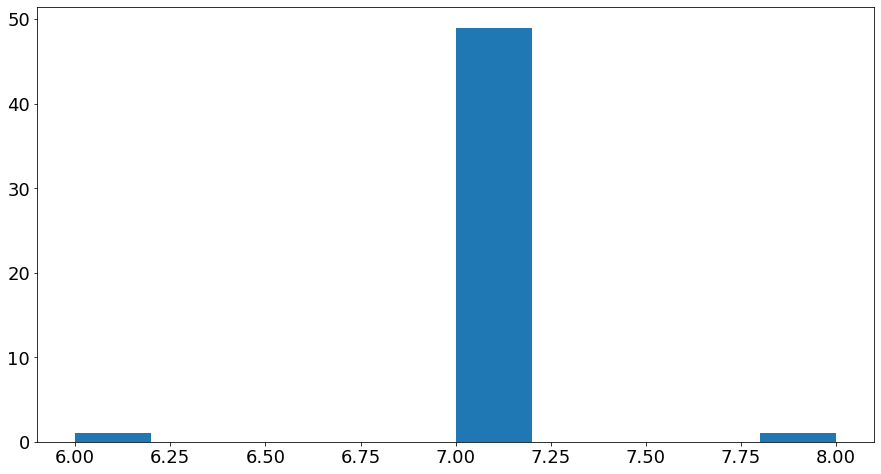

In [36]:
#plt.plot(x_autocorr*360, autocorr)
peaks = detect_peaks(autocorr[:365], edge='rising', valley=False, mpd=5, show=True)
plt.hist((pd.DataFrame(x_autocorr[peaks]*365).astype('int')).diff().iloc[:365])
(pd.DataFrame(x_autocorr[peaks]*365)).diff().value_counts()

<a id='desafios'></a>
____________________
<h2><b><span style="color:#5C0040">Desafio:</span></b></h2>

___________________________________________________
| [Home](#home) | [Aula 03](Aula_03.ipynb) |